# Analysis of Ar39 aggregation (multiple event over the same time window)
In this notebook, we analyse the result of aggregation of multiple Ar39 events (from 1 to 4) over the same time window `T=100ns`.
Parameters:
- Integration time `Dt=4ns`, according to the FlashADC frequency
- Time window `T=100ns`, as overestimation of most of muon background. Note: this is just an example, we should consider `T` w.r.t. the events we are looking for (*i.e. Ar41 de-excitations occur in which tau?*)
- Number of multiple Ar39 `Grp=1,2,3,4,5,6,7`. More than this number present a negligible probability.

### Details: Data Production
To produce the data, we have performed the following steps:
1. Consider CJ simulation data: `975465` events (`~1e6` Ar39 decays) in the volume delimited by `+-500, +-500, +-1000`.
1. Cut all entries out of Map region `+-700. +-700, +-845`. This cut results in `820550` events.
1. For each non-zero detection, produce sliced detections with *sampling trick*. The cut of non-zero detection results in `691968` events. The overall number of remaining entries are `1545306`.

We produced Ar39 pileups from 1 to 7 events over the same time window. **Note**: considering such a small time window `T=100ns`, only up to 4 Ar39s is interesting (*prob. ~7.47e-16*). However, to study the spatial distribution (*not dependent on time*), we generate even the other very-rare events, that result possible considering `T=10us`. The dataset creation should be repeated for larger time windows.

The following table summarizes the time/space to produce the data on desktop-pc (*4 cores, 9.7GB RAM*).
The output is partitioned in `csv` files of `100000` events each.

|Pileup Size| Time | Space|Output Files| Nr Output Events|
|-----------|------|------|------------|-----------------|
|          1| 16m  |2.6 GB|           7|           691968|
|          2|  8m  |1.3 GB|           4|           345983|
|          3| 5m28s|877 MB|           3|           230655|
|          4|    4m|661 MB|           2|           172991|
|          5| 3m25s|531 MB|           2|           138393|
|          6|  3m6s|444 MB|           2|           115327|
|          7| 2m30s|380 MB|           1|            98852|

In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(os.path.join(dirin, files[0]), comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(os.path.join(dirin, file), comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    return df

In [3]:
# Aggregation of 4 Ar39 decays for each snapshot
dirin = os.path.join("..", "..", "Development", "Out")
prefix_1Ar39_files = "Ar39_Snapshots_T100_DT4_Grp1_Seed123456789_Part1.csv"
prefix_2Ar39_files = "Ar39_Snapshots_T100_DT4_Grp2_Seed123456789_Part1.csv"
prefix_3Ar39_files = "Ar39_Snapshots_T100_DT4_Grp3_Seed123456789_Part1.csv"
prefix_4Ar39_files = "Ar39_Snapshots_T100_DT4_Grp4_Seed123456789_Part1.csv"
prefix_5Ar39_files = "Ar39_Snapshots_T100_DT4_Grp5_Seed123456789_Part1.csv"
prefix_6Ar39_files = "Ar39_Snapshots_T100_DT4_Grp6_Seed123456789_Part1.csv"
prefix_7Ar39_files = "Ar39_Snapshots_T100_DT4_Grp7_Seed123456789_Part1.csv"

df1 = load_dataframe_from_files(dirin, prefix_1Ar39_files)
df2 = load_dataframe_from_files(dirin, prefix_2Ar39_files)
df3 = load_dataframe_from_files(dirin, prefix_3Ar39_files)
df4 = load_dataframe_from_files(dirin, prefix_4Ar39_files)
df5 = load_dataframe_from_files(dirin, prefix_5Ar39_files)
df6 = load_dataframe_from_files(dirin, prefix_6Ar39_files)
df7 = load_dataframe_from_files(dirin, prefix_7Ar39_files)

print("[Info] Loaded datasets")
print("[Info] 1 Ar39: {} events".format(df1.eventnumber.nunique()))
print("[Info] 2 Ar39: {} events".format(df2.eventnumber.nunique()))
print("[Info] 3 Ar39: {} events".format(df3.eventnumber.nunique()))
print("[Info] 4 Ar39: {} events".format(df4.eventnumber.nunique()))
print("[Info] 5 Ar39: {} events".format(df5.eventnumber.nunique()))
print("[Info] 6 Ar39: {} events".format(df6.eventnumber.nunique()))
print("[Info] 7 Ar39: {} events".format(df7.eventnumber.nunique()))

[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp1_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp2_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp3_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp4_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp5_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp6_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp7_Seed123456789_Part1.csv
[Info] Loaded datasets
[Info] 1 Ar39: 100000 events
[Info] 2 Ar39: 100000 events
[Info] 3 Ar39: 100000 events
[Info] 4 Ar39: 100000 events
[Info] 5 Ar39: 100000 events
[Info] 6 Ar39: 100000 events
[Info] 7 Ar39: 98852 events


In [4]:
groupby_event_df1 = df1.groupby("eventnumber").sum()
groupby_event_df2 = df2.groupby("eventnumber").sum()
groupby_event_df3 = df3.groupby("eventnumber").sum()
groupby_event_df4 = df4.groupby("eventnumber").sum()
groupby_event_df5 = df5.groupby("eventnumber").sum()
groupby_event_df6 = df6.groupby("eventnumber").sum()
groupby_event_df7 = df7.groupby("eventnumber").sum()

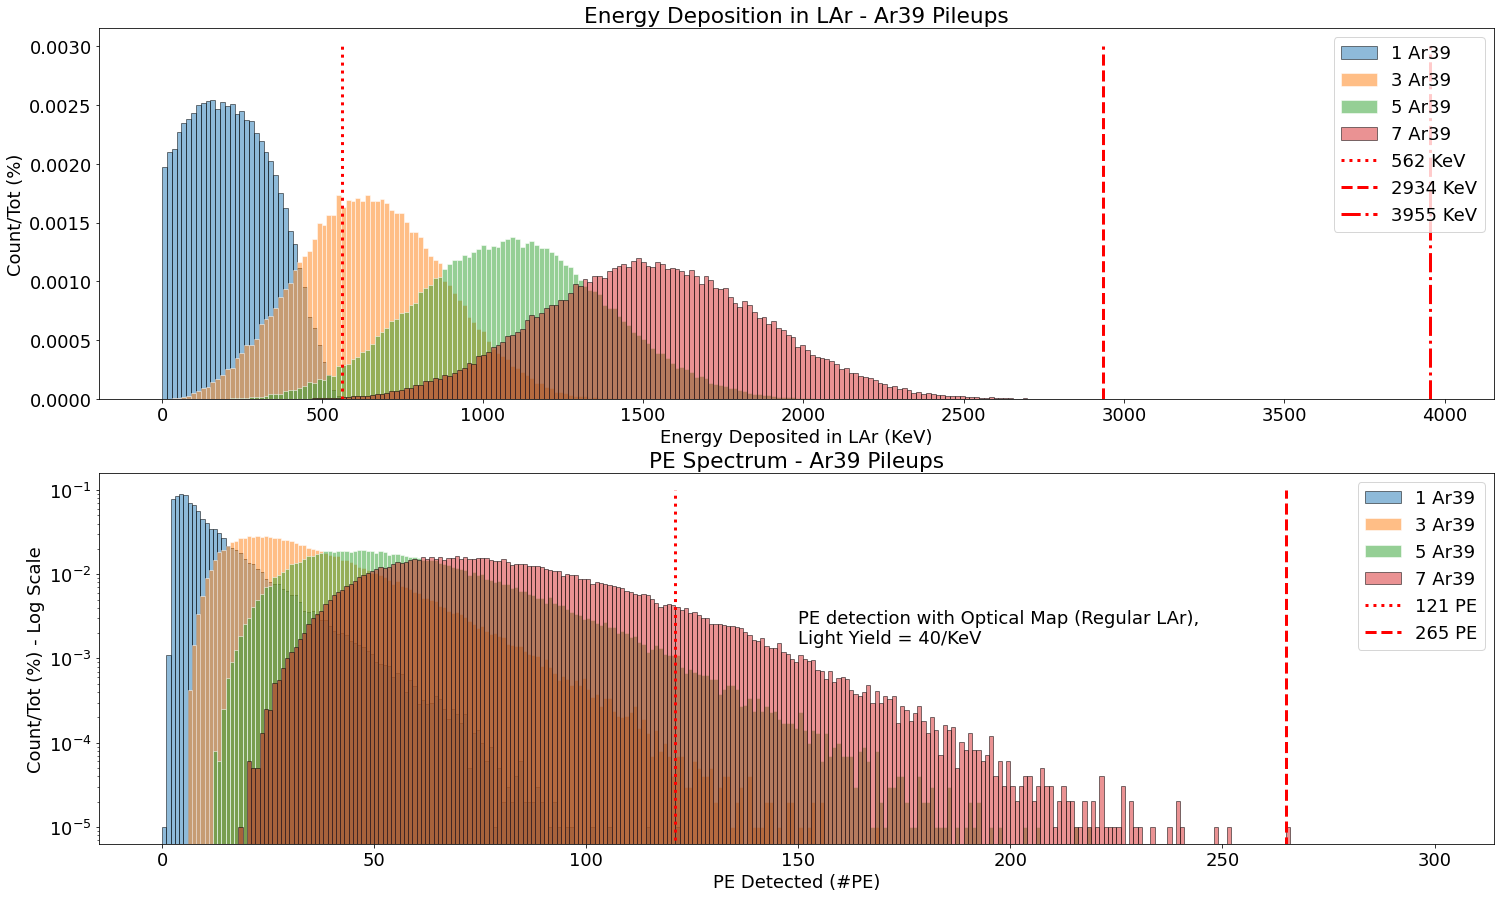

In [11]:
alpha=0.5
ar39_max_energy = 565
best_eff = 0.0092

plt.subplot(2,1,1)
plt.title("Energy Deposition in LAr - Ar39 Pileups")
bins = np.linspace(0, 3000, 200)
plt.hist(groupby_event_df1.energydeposition, bins=bins, label="1 Ar39", density=True, edgecolor='k', alpha=alpha)
#plt.hist(groupby_event_df2.energydeposition, bins=bins, label="2 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df3.energydeposition, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(groupby_event_df4.energydeposition, bins=bins, label="4 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df5.energydeposition, bins=bins, label="5 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(groupby_event_df6.energydeposition, bins=bins, label="6 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df7.energydeposition, bins=bins, label="7 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=int(groupby_event_df1.energydeposition.max()), ymin=0, ymax=0.003, color='r', linestyles='dotted', linewidth=3, label="{} KeV".format(int(groupby_event_df1.energydeposition.max())))
plt.vlines(x=int(groupby_event_df7.energydeposition.max()), ymin=0, ymax=0.003, color='r', linestyles='dashed', linewidth=3, label="{} KeV".format(int(groupby_event_df7.energydeposition.max())))
plt.vlines(x=7 * ar39_max_energy, ymin=0, ymax=0.003, color='r', linestyles='dashdot', linewidth=3, label="{} KeV".format(7*ar39_max_energy))
plt.xlabel("Energy Deposited in LAr (KeV)")
plt.ylabel("Count/Tot (%)")
plt.legend()

plt.subplot(2,1,2)
bins = np.linspace(0, 299, 300)
plt.hist(groupby_event_df1.pedetected, bins=bins, label="1 Ar39", density=True, edgecolor='k', alpha=alpha)
#plt.hist(groupby_event_df2.pedetected, bins=bins, label="2 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df3.pedetected, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(groupby_event_df4.pedetected, bins=bins, label="4 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df5.pedetected, bins=bins, label="5 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(groupby_event_df6.pedetected, bins=bins, label="6 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df7.pedetected, bins=bins, label="7 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=groupby_event_df1.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dotted', linewidth=3, label="{} PE".format(groupby_event_df1.pedetected.max()))
plt.vlines(x=groupby_event_df7.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dashed', linewidth=3, label="{} PE".format(groupby_event_df7.pedetected.max()))
#plt.vlines(x=int(7*ar39_max_energy*40*best_eff), ymin=0, ymax=0.003, color='r', linestyles='dashdot', linewidth=3, label="{} PE".format(int(7*ar39_max_energy*40*best_eff)))
plt.title("PE Spectrum - Ar39 Pileups")
plt.xlabel("PE Detected (#PE)")
plt.ylabel("Count/Tot (%) - Log Scale")
plt.yscale('log')
plt.text(150, 0.0015, "PE detection with Optical Map (Regular LAr),\nLight Yield = 40/KeV")
plt.legend()
plt.show()

In [7]:
len(groupby_event_df6.energydeposition[groupby_event_df6.energydeposition>2500]) + \
len(groupby_event_df7.energydeposition[groupby_event_df7.energydeposition>2500])

222

In [8]:
std_event_df1 = groupby_event_df1.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df2 = groupby_event_df2.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df3 = groupby_event_df3.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df4 = groupby_event_df4.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df5 = groupby_event_df5.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df6 = groupby_event_df6.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df7 = groupby_event_df7.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

/home/luigi/.local/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/luigi/.local/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/luigi/.local/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


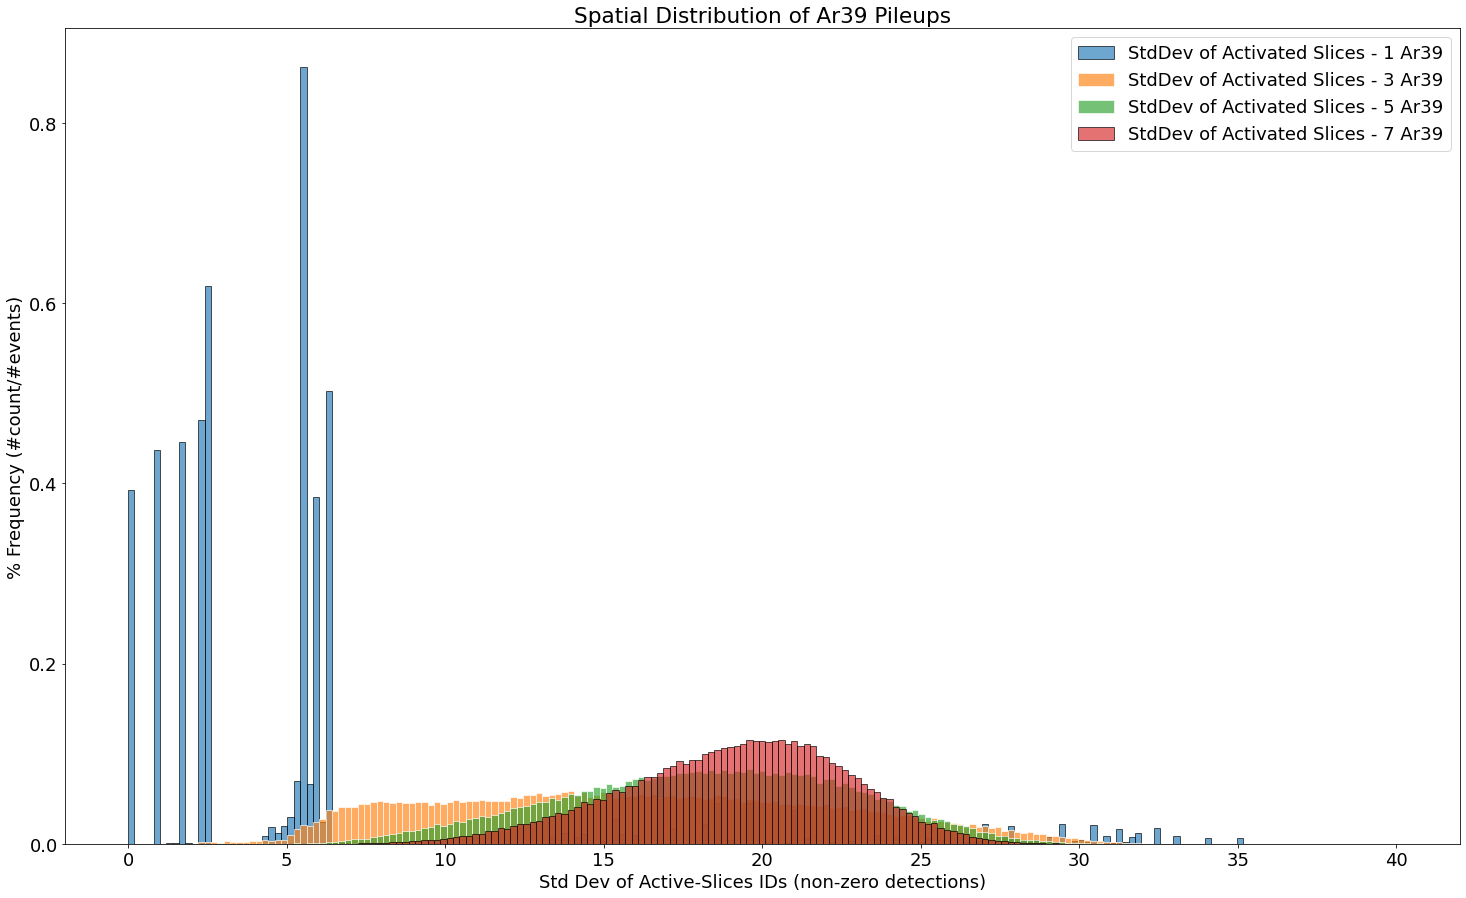

In [9]:
alpha=0.65
bins = np.linspace(0, 40, 200)
plt.title("Spatial Distribution of Ar39 Pileups")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("% Frequency (#count/#events)")
plt.hist(std_event_df1, bins=bins, label="StdDev of Activated Slices - 1 Ar39", density=True, edgecolor='k', alpha=alpha)
#plt.hist(std_event_df2, bins=bins, label="StdDev of Activated Slices - 2 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(std_event_df3, bins=bins, label="StdDev of Activated Slices - 3 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(std_event_df4, bins=bins, label="StdDev of Activated Slices - 4 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(std_event_df5, bins=bins, label="StdDev of Activated Slices - 5 Ar39", density=True, edgecolor='w', alpha=alpha)
#plt.hist(std_event_df6, bins=bins, label="StdDev of Activated Slices - 6 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(std_event_df7, bins=bins, label="StdDev of Activated Slices - 7 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.legend()
plt.show()

In [35]:
row = groupby_event_df1.loc[2]
np.std(np.nonzero([row[2:]])[1])
row[2:].to_numpy()[np.nonzero(row[2:].to_numpy())]
np.nonzero(row[2:].to_numpy())



(array([41, 43, 45]),)

energydeposition    0.0
pedetected          0.0
slice0              0.0
slice1              0.0
slice2              0.0
                   ... 
slice68             0.0
slice69             0.0
slice70             0.0
slice71             0.0
Unnamed: 75         0.0
Name: 1, Length: 75, dtype: float64

In [23]:
row[43:48]

slice41    1.0
slice42    0.0
slice43    2.0
slice44    0.0
slice45    1.0
Name: 2, dtype: float64